In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mahikamiglani","key":"af91427f3c086dd7c04b6b9886ec86df"}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets list

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                     📚 Students Performance Dataset 📚                  66KB  2024-06-12 23:09:20           3376         64  1.0              
mayankanand2701/samsung-stock-price-dataset                     Samsung Stock Price Dataset 📱🏭📈                  114KB  2024-06-13 14:51:11           1149         30  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data  Online Sales Dataset - Popular Marketplace Data    7KB  2024-05-25 23:55:26          10899        195  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024               Most Stream

In [7]:
! kaggle datasets download -d rupakroy/online-payments-fraud-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset
License(s): CC-BY-NC-SA-4.0
 95% 168M/178M [00:00<00:00, 169MB/s]
100% 178M/178M [00:01<00:00, 186MB/s]


In [8]:
! unzip online-payments-fraud-detection-dataset.zip

Archive:  online-payments-fraud-detection-dataset.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [9]:
import pandas as pd

In [10]:
df= pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [11]:
df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [12]:
df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [13]:
#one hot coding
#text feature to 5 numerical features
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df['type'])
# Drop column B as it is now encoded
df = df.drop('type',axis = 1)
# Join the encoded df
df = df.join(one_hot)

In [8]:
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True


In [14]:
df = df.drop(columns=["nameOrig"])

In [10]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False
1,1,1864.28,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False
2,1,181.00,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True
3,1,181.00,181.00,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False
4,1,11668.14,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False
6362616,743,6311409.28,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True
6362617,743,6311409.28,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False
6362618,743,850002.52,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True


In [15]:
df["nameDest_type"]=df["nameDest"].str[:1]
df

,step,amount,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_type
0,1,9839.64,170136.00,160296.36,M1979787155,0.00,0.00,0,0,False,False,False,True,False,M
1,1,1864.28,21249.00,19384.72,M2044282225,0.00,0.00,0,0,False,False,False,True,False,M
2,1,181.00,181.00,0.00,C553264065,0.00,0.00,1,0,False,False,False,False,True,C
3,1,181.00,181.00,0.00,C38997010,21182.00,0.00,1,0,False,True,False,False,False,C
4,1,11668.14,41554.00,29885.86,M1230701703,0.00,0.00,0,0,False,False,False,True,False,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,C776919290,0.00,339682.13,1,0,False,True,False,False,False,C
6362616,743,6311409.28,6311409.28,0.00,C1881841831,0.00,0.00,1,0,False,False,False,False,True,C
6362617,743,6311409.28,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,False,True,False,False,False,C
6362618,743,850002.52,850002.52,0.00,C2080388513,0.00,0.00,1,0,False,False,False,False,True,C


In [16]:
df = df.drop(columns=["nameDest"])

In [17]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,nameDest_type
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,False,True,False,M
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,False,True,False,M
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,False,True,C
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,False,True,False,False,False,C
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,False,True,False,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,False,True,False,False,False,C
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,False,True,C
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,False,True,False,False,False,C
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,False,True,C


In [18]:
#one hot coding
#text feature to 5 numerical features
# Get one hot encoding of columns B
one_hot = pd.get_dummies(df['nameDest_type'])
# Drop column B as it is now encoded
df = df.drop('nameDest_type',axis = 1)
# Join the encoded df
df = df.join(one_hot)

In [19]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C,M
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,False,False,False,True,False,False,True
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,False,False,False,True,False,False,True
2,1,181.00,181.00,0.00,0.00,0.00,1,0,False,False,False,False,True,True,False
3,1,181.00,181.00,0.00,21182.00,0.00,1,0,False,True,False,False,False,True,False
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,1,0,False,True,False,False,False,True,False
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,1,0,False,False,False,False,True,True,False
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,False,True,False,False,False,True,False
6362618,743,850002.52,850002.52,0.00,0.00,0.00,1,0,False,False,False,False,True,True,False


In [20]:
df = df.drop(columns=["M"])

In [21]:
def norm_column(df, col):
    df_col = df[col]
    min_val = df_col.min()
    max_val = df_col.max()
    df[col] = (df_col - min_val) / (max_val - min_val)

In [22]:
norm_cols=[
    "step",
    "amount",
    "oldbalanceOrg",
    "newbalanceOrig",
    "oldbalanceDest",
    "newbalanceDest"
]
for col in norm_cols:
    norm_column(df, col)


In [23]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
0,0.0,0.000106,0.002855,0.003233,0.000000,0.000000,0,0,False,False,False,True,False,False
1,0.0,0.000020,0.000357,0.000391,0.000000,0.000000,0,0,False,False,False,True,False,False
2,0.0,0.000002,0.000003,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
3,0.0,0.000002,0.000003,0.000000,0.000059,0.000000,1,0,False,True,False,False,False,True
4,0.0,0.000126,0.000697,0.000603,0.000000,0.000000,0,0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.003674,0.005701,0.000000,0.000000,0.000954,1,0,False,True,False,False,False,True
6362616,1.0,0.068272,0.105923,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
6362617,1.0,0.068272,0.105923,0.000000,0.000192,0.017912,1,0,False,True,False,False,False,True
6362618,1.0,0.009195,0.014265,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True


In [25]:
# df_isFraud = df[df["isFraud"]==1]
# df_isFraud

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
2,0.0,0.000002,0.000003,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True
3,0.0,0.000002,0.000003,0.0,0.000059,0.000000,1,0,False,True,False,False,False,True
251,0.0,0.000030,0.000047,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True
252,0.0,0.000030,0.000047,0.0,0.000074,0.000000,1,0,False,True,False,False,False,True
680,0.0,0.000218,0.000338,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.003674,0.005701,0.0,0.000000,0.000954,1,0,False,True,False,False,False,True
6362616,1.0,0.068272,0.105923,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True
6362617,1.0,0.068272,0.105923,0.0,0.000192,0.017912,1,0,False,True,False,False,False,True
6362618,1.0,0.009195,0.014265,0.0,0.000000,0.000000,1,0,False,False,False,False,True,True


In [26]:
# df_isnotFraud = df[df["isFraud"]==0]
# df_isnotFraud

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
0,0.000000,0.000106,0.002855,0.003233,0.00000,0.000000,0,0,False,False,False,True,False,False
1,0.000000,0.000020,0.000357,0.000391,0.00000,0.000000,0,0,False,False,False,True,False,False
4,0.000000,0.000126,0.000697,0.000603,0.00000,0.000000,0,0,False,False,False,True,False,False
5,0.000000,0.000085,0.000904,0.000929,0.00000,0.000000,0,0,False,False,False,True,False,False
6,0.000000,0.000077,0.003075,0.003551,0.00000,0.000000,0,0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362319,0.966307,0.000093,0.008707,0.010289,0.00000,0.000000,0,0,False,False,False,True,False,False
6362320,0.966307,0.001722,0.000065,0.000000,0.00000,0.000447,0,0,False,True,False,False,False,True
6362321,0.966307,0.002015,0.002820,0.000000,0.00007,0.000593,0,0,False,True,False,False,False,True
6362322,0.966307,0.000888,0.000226,0.000000,0.00000,0.000230,0,0,False,False,False,False,True,True


In [27]:
# df_isnotFraud = df_isnotFraud.sample(n=8213)
# df_isnotFraud

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
1547240,0.206199,0.000900,0.000178,0.001892,0.000273,0.000039,0,0,True,False,False,False,False,True
5400647,0.506739,0.000792,0.000000,0.000000,0.017309,0.017506,0,0,False,True,False,False,False,True
2305374,0.252022,0.000058,0.149616,0.179898,0.002729,0.002713,0,0,True,False,False,False,False,True
1741235,0.215633,0.000501,0.000000,0.000000,0.000000,0.000000,0,0,False,False,False,True,False,False
3117588,0.316712,0.000163,0.003002,0.003304,0.000000,0.000000,0,0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3076763,0.315364,0.000015,0.000189,0.000200,0.000000,0.000000,0,0,False,False,False,True,False,False
1418552,0.185984,0.000137,0.001647,0.001724,0.000000,0.000000,0,0,False,False,False,True,False,False
851802,0.053908,0.001583,0.000000,0.000000,0.001386,0.001796,0,0,False,True,False,False,False,True
4500110,0.436658,0.000876,0.000000,0.000000,0.028197,0.028411,0,0,False,True,False,False,False,True


In [28]:
# df = pd.concat([df_isFraud, df_isnotFraud])
# df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
2,0.000000,0.000002,0.000003,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
3,0.000000,0.000002,0.000003,0.000000,0.000059,0.000000,1,0,False,True,False,False,False,True
251,0.000000,0.000030,0.000047,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
252,0.000000,0.000030,0.000047,0.000000,0.000074,0.000000,1,0,False,True,False,False,False,True
680,0.000000,0.000218,0.000338,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3076763,0.315364,0.000015,0.000189,0.000200,0.000000,0.000000,0,0,False,False,False,True,False,False
1418552,0.185984,0.000137,0.001647,0.001724,0.000000,0.000000,0,0,False,False,False,True,False,False
851802,0.053908,0.001583,0.000000,0.000000,0.001386,0.001796,0,0,False,True,False,False,False,True
4500110,0.436658,0.000876,0.000000,0.000000,0.028197,0.028411,0,0,False,True,False,False,False,True


In [37]:
from imblearn.under_sampling import RandomUnderSampler
x = df.drop(columns=["isFraud"])
X = df[x.columns].values
print(X)
# print(X)
# x=df.columns
# x.delete(6)
# X= df[x ].values
y=df["isFraud"].values
rus = RandomUnderSampler(random_state=0)
rus.fit(X, y)
X_resampled, y_resampled = rus.fit_resample(X, y)
pass

[[0.0 0.00010643717897448055 0.002855347566159583 ... True False False]
 [0.0 2.0166256490943227e-05 0.000356616356522576 ... True False False]
 [0.0 1.957909983940569e-06 3.0376752096845143e-06 ... False True True]
 ...
 [1.0 0.06827166432070253 0.10592271551397123 ... False False True]
 [1.0 0.009194632156257697 0.014265367862836276 ... False True True]
 [1.0 0.009194632156257697 0.014265367862836276 ... False False True]]


In [40]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,C
0,0.0,0.000106,0.002855,0.003233,0.000000,0.000000,0,0,False,False,False,True,False,False
1,0.0,0.000020,0.000357,0.000391,0.000000,0.000000,0,0,False,False,False,True,False,False
2,0.0,0.000002,0.000003,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
3,0.0,0.000002,0.000003,0.000000,0.000059,0.000000,1,0,False,True,False,False,False,True
4,0.0,0.000126,0.000697,0.000603,0.000000,0.000000,0,0,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,1.0,0.003674,0.005701,0.000000,0.000000,0.000954,1,0,False,True,False,False,False,True
6362616,1.0,0.068272,0.105923,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True
6362617,1.0,0.068272,0.105923,0.000000,0.000192,0.017912,1,0,False,True,False,False,False,True
6362618,1.0,0.009195,0.014265,0.000000,0.000000,0.000000,1,0,False,False,False,False,True,True


In [44]:
from sklearn.model_selection import train_test_split
X = pd.DataFrame(X_resampled, columns=x.columns)  # Ensure X_resampled is a DataFrame with the correct column names
y = pd.Series(y_resampled)  # Convert y_resampled to a Series

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Verify the columns of X_train
print(X_train.columns)

# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
# print(X_train.columns)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=0)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("Random Forest Model")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFlaggedFraud', 'CASH_IN', 'CASH_OUT', 'DEBIT',
       'PAYMENT', 'TRANSFER', 'C'],
      dtype='object')
Random Forest Model
Confusion Matrix:
[[1614   16]
 [  10 1646]]


In [45]:
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_rf))


Accuracy Score:
0.9920876445526476


In [46]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1630
           1       0.99      0.99      0.99      1656

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



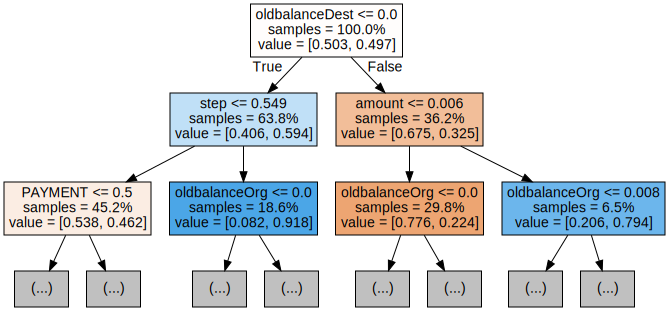

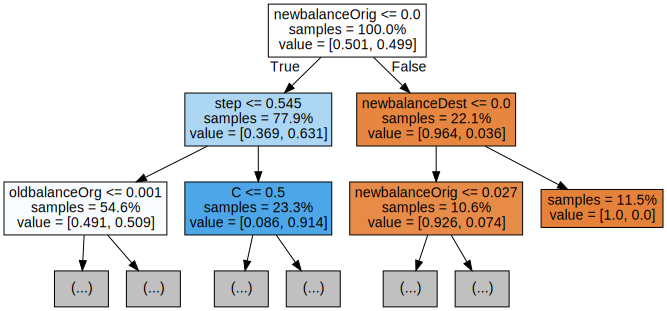

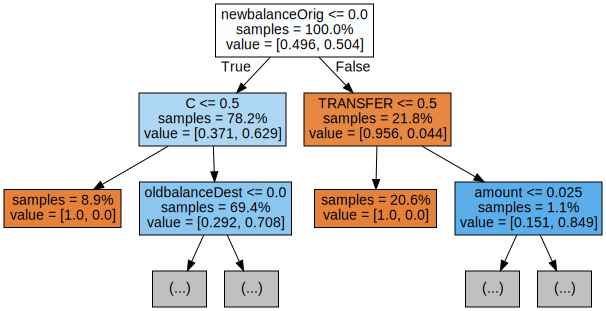

In [47]:
# Export the first three decision trees from the forest
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz



for i in range(3):
    tree = rf_model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e89563137c0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e89a9437250>})

In [51]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 16, 'n_estimators': 220}


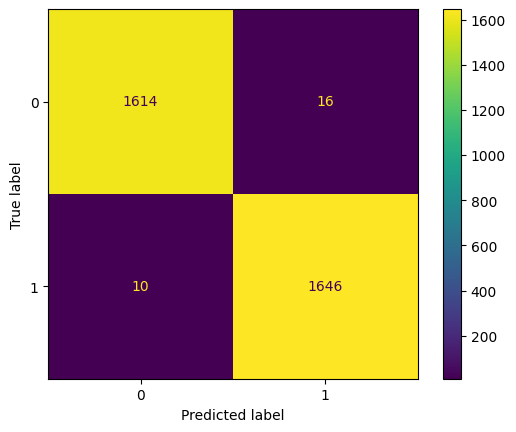

In [52]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [55]:


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9920876445526476
Precision: 0.9903730445246691
Recall: 0.9939613526570048


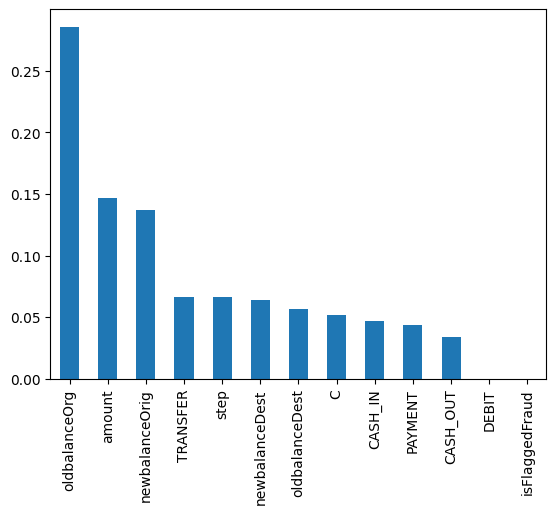

In [56]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();